In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset

In [2]:
df= pd.read_csv("G:/My Drive/Data Analytics Training Course/Python/Dataset/revenue_prediction.csv")
df

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715
...,...,...,...,...,...,...,...,...
95,196,Wetzel'sPretzels,No,Italian/Pizza,Bengaluru,19,1.1,1270499
96,197,LaMadeleineCountryFrenchCafe,Yes,Varied Menu,Bengaluru,75,6.3,6412623
97,198,Giordano's,Yes,Varied Menu,Gurugram,77,6.2,6694797
98,199,IslandsFineBurgers&Drinks,Yes,Sports Bar,Pune,25,2.1,2344689


In [3]:
df.head()

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    object 
 3   Category      100 non-null    object 
 4   City          100 non-null    object 
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


# Check Null values in a dataset

In [4]:
df.isnull().sum()

Id              0
Name            0
Franchise       0
Category        0
City            0
No_Of_Item      0
Order_Placed    0
Revenue         0
dtype: int64

In [5]:
df.shape

(100, 8)

In [9]:
df.drop(["Id"], axis = 1 , inplace =True)

In [10]:
df.describe()

,No_Of_Item,Order_Placed,Revenue
count,100.000000,100.000000,1.000000e+02
mean,49.080000,4.086000,4.395161e+06
std,22.370923,2.055101,2.659932e+06
min,18.000000,1.000000,8.498700e+05
25%,34.750000,2.750000,2.688328e+06
50%,45.000000,3.650000,3.911401e+06
75%,57.250000,5.100000,5.330084e+06
max,126.000000,13.000000,1.969694e+07


# check outliers from given dataset

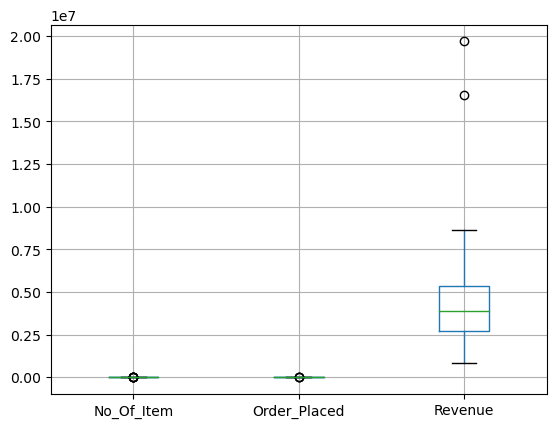

In [12]:
df.boxplot(column = ["No_Of_Item" , "Order_Placed" , "Revenue"])
plt.show()

# Remove outliers in dataset with the help of Zscore

In [15]:
# find limits

upper_limit = df["Revenue"].mean() + 3 * df["Revenue"].std()
lower_limit = df["Revenue"].mean() - 3 * df["Revenue"].std()

print("Upper_Limit:  ",upper_limit)
print("Lower_Limit:  ",lower_limit)

Upper_Limit:   12374957.464884475
Lower_Limit:   -3584635.664884475


In [18]:
# find outliers

df.loc[(df["Revenue"] > upper_limit) | (df["Revenue"] < lower_limit)]

,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
16,ZoesKitchen,Yes,Burger,Bengaluru,123,10.8,19696939
75,WhichWich,No,Bakery Cafe,Bengaluru,126,13.0,16549064


In [19]:
# trimming the outlier in a dataset

new_df = df.loc[(df["Revenue"] < upper_limit) & (df["Revenue"] > lower_limit)]
print("before removing outliers: ", len(df))
print("after removing outliers: ", len(new_df))
print("outliers:" , len(df) - len(new_df))                

before removing outliers:  100
after removing outliers:  98
outliers: 2


In [21]:
new_df

,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715
...,...,...,...,...,...,...,...
95,Wetzel'sPretzels,No,Italian/Pizza,Bengaluru,19,1.1,1270499
96,LaMadeleineCountryFrenchCafe,Yes,Varied Menu,Bengaluru,75,6.3,6412623
97,Giordano's,Yes,Varied Menu,Gurugram,77,6.2,6694797
98,IslandsFineBurgers&Drinks,Yes,Sports Bar,Pune,25,2.1,2344689


In [22]:
# find numerical and categorical variable 

numerical_features = new_df.select_dtypes(include = [np.number])
categorical_features = new_df.select_dtypes(exclude = [np.number])

In [23]:
numerical_features

,No_Of_Item,Order_Placed,Revenue
0,55,5.5,5953753
1,72,6.8,7223131
2,25,1.9,2555379
3,18,2.5,2175511
4,48,4.2,4816715
...,...,...,...
95,19,1.1,1270499
96,75,6.3,6412623
97,77,6.2,6694797
98,25,2.1,2344689


In [24]:
categorical_features

,Name,Franchise,Category,City
0,HungryHowie'sPizza,Yes,Mexican,Bengaluru
1,CharleysPhillySteaks,No,Varied Menu,Gurugram
2,Chuy's,Yes,Chicken,Pune
3,O'Charley's,Yes,Italian/Pizza,Mumbai
4,PolloTropical,Yes,Pizza,Noida
...,...,...,...,...
95,Wetzel'sPretzels,No,Italian/Pizza,Bengaluru
96,LaMadeleineCountryFrenchCafe,Yes,Varied Menu,Bengaluru
97,Giordano's,Yes,Varied Menu,Gurugram
98,IslandsFineBurgers&Drinks,Yes,Sports Bar,Pune


# Using LabelEncoder for convert categorical to binary form

In [25]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le = LabelEncoder()
for col in categorical_features:
    new_df[col] = le.fit_transform(new_df[col])

C:\Users\admin\AppData\Local\Temp\ipykernel_10056\3851865092.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col] = le.fit_transform(new_df[col])
C:\Users\admin\AppData\Local\Temp\ipykernel_10056\3851865092.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col] = le.fit_transform(new_df[col])
C:\Users\admin\AppData\Local\Temp\ipykernel_10056\3851865092.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [31]:
new_df.head(10)

,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,40,1,12,0,55,5.5,5953753
1,14,0,19,1,72,6.8,7223131
2,16,1,5,4,25,1.9,2555379
3,60,1,11,2,18,2.5,2175511
4,68,1,13,3,48,4.2,4816715
5,53,1,15,3,56,4.9,4517319
6,17,1,18,3,58,5.0,5966635
7,51,1,13,2,49,4.3,6491607
8,73,1,12,2,59,4.8,5152497
9,15,1,18,4,76,5.3,4544227


# Independent and dependent features separate

In [42]:
X = new_df.iloc[: , :-1].values
X

array([[ 40. ,   1. ,  12. ,   0. ,  55. ,   5.5],
       [ 14. ,   0. ,  19. ,   1. ,  72. ,   6.8],
       [ 16. ,   1. ,   5. ,   4. ,  25. ,   1.9],
       [ 60. ,   1. ,  11. ,   2. ,  18. ,   2.5],
       [ 68. ,   1. ,  13. ,   3. ,  48. ,   4.2],
       [ 53. ,   1. ,  15. ,   3. ,  56. ,   4.9],
       [ 17. ,   1. ,  18. ,   3. ,  58. ,   5. ],
       [ 51. ,   1. ,  13. ,   2. ,  49. ,   4.3],
       [ 73. ,   1. ,  12. ,   2. ,  59. ,   4.8],
       [ 15. ,   1. ,  18. ,   4. ,  76. ,   5.3],
       [ 86. ,   0. ,   9. ,   0. ,  40. ,   3.6],
       [ 87. ,   1. ,  13. ,   0. ,  56. ,   5. ],
       [ 20. ,   1. ,   6. ,   0. ,  22. ,   1.6],
       [  7. ,   1. ,   2. ,   0. ,  55. ,   4.7],
       [ 64. ,   0. ,  14. ,   0. ,  22. ,   1.8],
       [ 24. ,   0. ,   3. ,   0. ,  36. ,   3.1],
       [ 22. ,   1. ,   0. ,   1. , 100. ,   8.1],
       [ 46. ,   1. ,  19. ,   4. ,  59. ,   5.2],
       [  4. ,   0. ,   8. ,   2. ,  25. ,   1.9],
       [ 21. ,   1. ,   8. ,   

In [44]:
y = new_df.iloc[:,6:].values
y

array([[5953753],
       [7223131],
       [2555379],
       [2175511],
       [4816715],
       [4517319],
       [5966635],
       [6491607],
       [5152497],
       [4544227],
       [3945135],
       [3861370],
       [2234634],
       [5107746],
       [1099097],
       [3918918],
       [7513524],
       [4937526],
       [1521934],
       [5025735],
       [ 849870],
       [4956086],
       [1999068],
       [7904084],
       [2778621],
       [2967425],
       [6135276],
       [7705945],
       [2447890],
       [2408199],
       [2358644],
       [3261924],
       [2371202],
       [4100886],
       [3903884],
       [3028267],
       [2740687],
       [5461700],
       [3818055],
       [6836483],
       [4554237],
       [4952255],
       [2732645],
       [4264176],
       [3752885],
       [4250758],
       [7865428],
       [7201784],
       [8630682],
       [2156098],
       [3273041],
       [1763231],
       [5595267],
       [4651866],
       [6941173],
       [23

# Standarized the data with the help of Standart Scaler 

In [47]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X = scale.fit_transform(X)

# Using PCA for feature selection

In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
X_pca = pca.fit_transform(X)
new_df1 = pd.DataFrame(X_pca)
new_df1

,0,1,2,3
0,0.875718,0.384003,-0.955723,-0.005904
1,2.011261,-0.868239,0.408602,-1.845004
2,-2.217953,1.829993,0.535943,-0.503983
3,-1.502954,0.472936,0.260355,1.087757
4,0.270641,0.930543,0.781683,0.867136
...,...,...,...,...
93,-1.622901,-2.012213,-0.401082,1.624352
94,2.232704,0.045601,-0.267590,0.079391
95,2.118368,0.454246,0.218193,-0.361085
96,-1.393860,0.844285,1.926705,0.464008


# Split the dataset into Train and test

In [52]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(new_df1 ,y , test_size = 0.30 , random_state =2) 

In [58]:
print("x_train: " , x_train.shape)
print("y_train: " , y_train.shape)

x_train:  (68, 4)
y_train:  (68, 1)


In [59]:
print("x_test: " , x_test.shape)
print("y_test: " , y_test.shape)

x_test:  (30, 4)
y_test:  (30, 1)


# Training Linear Regression Model on the training dataset

In [85]:
from sklearn.linear_model import LinearRegression
LR= LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

# Predict the test set

In [86]:
pred1 =LR.predict(x_test)
print(pred1)

[[2815871.91211962]
 [3385706.67080531]
 [2297474.59460621]
 [9542042.89859454]
 [8851164.07290465]
 [5032453.99417653]
 [2007898.5315933 ]
 [2284090.93476601]
 [9497287.64558578]
 [5146979.68498945]
 [4573780.51435616]
 [6773846.54357948]
 [6159053.09892672]
 [1834550.1094586 ]
 [5525175.4921661 ]
 [3972740.39164163]
 [2124852.42147089]
 [5069851.42588048]
 [1966396.87949288]
 [4060247.5612266 ]
 [5274707.29745344]
 [3927913.66845681]
 [2278323.07965187]
 [3225908.39366114]
 [5003420.45095509]
 [4742698.52221629]
 [3871968.60548938]
 [4306409.49055217]
 [1699562.26373515]
 [6634012.40568281]]


In [87]:
# find accuracy with the help of R2 Score

from sklearn.metrics import r2_score

score1 = r2_score(y_test , pred1)
score1

0.8411934550277665

# 2nd Model Decision Tree

In [88]:
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor()
DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [89]:
pred2 = DT.predict(x_test)
pred2

array([3004429., 2732645., 1904842., 7495092., 7865428., 5286212.,
       1763231., 2732645., 7865428., 3945135., 5286212., 6836483.,
       6941173., 1270499., 5461700., 2778621., 2344689., 5286212.,
       1904842., 4052733., 4250758., 3752885., 2344689., 3945135.,
       5966635., 3836721., 3982767., 3945135., 2083447., 6694797.])

In [90]:
score2 = r2_score(y_test, pred2)
score2

0.8245567846594587

# 3rd Model Random Forest

In [91]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(x_train,y_train)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [92]:
pred3 = RF.predict(x_test)
pred3

array([2469230.5 , 3487026.93, 2490504.75, 7402768.39, 7502171.28,
       5168510.84, 2015512.21, 2974881.32, 7389248.96, 3922114.22,
       4539115.39, 6742641.06, 6810603.86, 1903498.35, 5284064.46,
       3518212.14, 2073759.1 , 5255327.53, 2250261.91, 4398092.23,
       5058191.45, 3602671.95, 2197421.09, 3167320.58, 5424585.52,
       3857908.32, 3410130.94, 3912311.64, 1822087.23, 6695092.54])

In [93]:
score3 = r2_score(y_test,pred3)
score3

0.8478724794713054

# 4th Model Gradient Boosting

In [94]:
from sklearn.ensemble import GradientBoostingRegressor

GB = GradientBoostingRegressor()
GB.fit(x_train,y_train)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [95]:
pred4 = GB.predict(x_test)
pred4

array([2465421.08307937, 3223969.41961783, 2536813.5069595 ,
       7067443.83169064, 7283249.28655857, 4991405.05010433,
       2418607.09684124, 3046569.10873847, 7424717.61597856,
       4131272.31176842, 4522597.08000314, 6601944.83735434,
       6699116.42200258, 1772333.55687336, 5528089.16136188,
       3479389.50424989, 2068256.90325372, 5113483.96070766,
       2199916.34385926, 4274847.01650891, 5121630.26737354,
       3735034.79150979, 2352064.73406736, 2870670.63213858,
       5596591.06347777, 4143996.1306096 , 3278036.78158446,
       3973253.40232225, 1660512.44412662, 6594991.94397441])

In [96]:
score4 = r2_score(y_test,pred4)
score4

0.8499444600874602

# 5th Model SVR

In [97]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(x_train,y_train)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [98]:
pred5 = svr.predict(x_test)
pred5

array([3827384.4957382 , 3827383.3058007 , 3827384.48963924,
       3827388.81369137, 3827388.37088871, 3827390.81037753,
       3827382.67740062, 3827379.92827022, 3827389.63206208,
       3827388.0259585 , 3827388.56249929, 3827396.04089642,
       3827392.26879765, 3827380.79195367, 3827395.13863625,
       3827387.64953059, 3827381.87935803, 3827391.19335582,
       3827383.65653638, 3827386.43632049, 3827393.81315241,
       3827385.83027173, 3827384.03617456, 3827386.91544176,
       3827396.50636433, 3827388.18402656, 3827388.76761812,
       3827387.75346753, 3827379.5579031 , 3827391.83322957])

In [99]:
score5 = r2_score(y_test,pred5)
score5

-0.08708459504722521

# All Accuracy here

In [100]:
print("Linear Regression:  " , score1)
print("Decision Tree:  ", score2)
print("Random Forest:  ", score3)
print("Gradient Boosting:  ", score4)
print("SVR:  ", score5)

Linear Regression:   0.8411934550277665
Decision Tree:   0.8245567846594587
Random Forest:   0.8478724794713054
Gradient Boosting:   0.8499444600874602
SVR:   -0.08708459504722521
